<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/09_Image_Correlation_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_style("whitegrid")
sns.set_style("ticks")

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo);
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.0, 0.7))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.0, 1, 0, 0.7))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.0, 1, 0.7))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

# Correlation - Convolution

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio
import skimage
import skimage.io
import skimage.filters
from scipy.ndimage.filters import correlate, convolve
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Képek betöltése és normalizálása [0, 1]
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255
histogram(A, bins=2**8, interval=[0, 1])

B = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')/255
histogram(B, bins=2**8, interval=[0, 1])

NameError: ignored

In [ ]:
summary(B)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.1608          0.1176          0.0902
    median:          0.2902          0.2510          0.2314
      mean:          0.3545          0.2842          0.2376
  3rd Quar:          0.3843          0.3451          0.3098
       max:          1.0000          0.9765          0.9294
     sigma:          0.2589          0.2063          0.1766


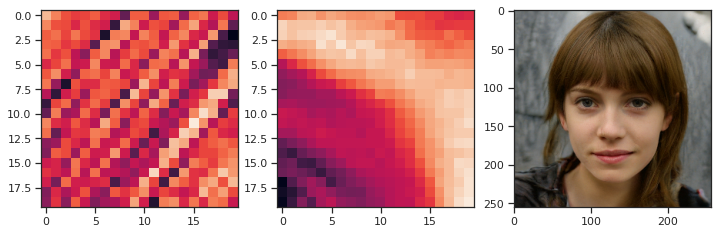

v.max =  0.5490196078431373
v.min =  0.24705882352941178
k.max =  0.596078431372549
k.min =  0.0784313725490196


In [ ]:
S = A[::4, ::4]

v = S[30:50, 80:100, 0]

k = S[100:120, 100:120, 0]


fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(12,4))
a1.imshow(v)
a2.imshow(k)
a3.imshow(S)
plt.show()

print('v.max = ', v.max())
print('v.min = ', v.min())
print('k.max = ', k.max())
print('k.min = ', k.min())


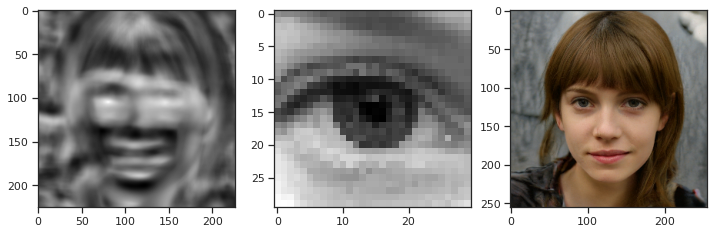

In [ ]:
S = A[::4, ::4]

k = S[105:135, 80:110, 0]
r = k.ravel()
kx = k.shape[0]
ky = k.shape[1]

x = S.shape[0]-kx
y = S.shape[1]-ky

c = np.zeros((x, y))

for i in range(x):
  for j in range(y):
    a = S[i:i+kx, j:j+ky, 0]
    b = a.ravel()
    corr, _ = pearsonr(r, b)
    c[i,j] = corr

fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(12,4))
a1.imshow(c, cmap='gray')
a2.imshow(k, cmap='gray')
a3.imshow(S)
plt.show()

# 1 Dimenziós korreláció

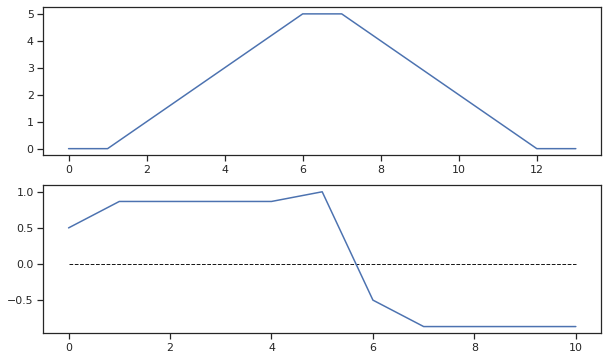

In [ ]:
y = np.array([0, 0, 1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0, 0])

k = np.array([4, 5, 5])

c = np.zeros(len(y)-len(k))
for i in range(len(y)-len(k)):
  c[i], _ = pearsonr(y[i:i+len(k)], k)

fig, (a1, a2) = plt.subplots(2, 1, figsize=(10, 6))
a1.plot(y)
a2.plot(c)
a2.hlines(0, 0, 10, lw = 1, linestyles = '--')
plt.show()

# Első és másodrendű derivált

A könyvben a 3.36 ábra

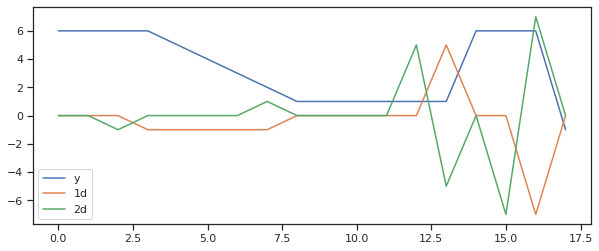

y = [ 6.  6.  6.  6.  5.  4.  3.  2.  1.  1.  1.  1.  1.  1.  6.  6.  6. -1.]
1 = [ 0.  0.  0. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  5.  0.  0. -7.  0.]
2 = [ 0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  5. -5.  0. -7.  7.  0.]


In [ ]:
y = np.array([6.0,6,6,6,5,4,3,2,1,1,1,1,1,1,6,6,6,-1])

d1 = np.zeros(len(y))
d2 = np.zeros(len(y))

for i in range(len(y)-1):
  d1[i] = y[i+1]-y[i]

for i in range(len(y)-1):
  d2[i] = d1[i+1]-d1[i]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y, label = 'y')
ax.plot(d1, label = '1d')
ax.plot(d2, label = '2d')
plt.legend()
plt.show()


print('y = {}'.format(y))
print('1 = {}'.format(d1))
print('2 = {}'.format(d2))

2 Dimenziós konvolúció

In [ ]:

A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255

S = A[::4, ::4]

k1 = np.array([[0, 1, 0],
               [1,-4, 1],
               [0, 1, 0]])

k2 = np.array([[1, 1, 1],
               [1,-8, 1],
               [1, 1, 1]])

k3 = np.array([[ 0, -1,  0],
               [-1,  4, -1],
               [ 0, -1,  0]])

k4 = np.array([[-1, -1, -1],
               [-1,  8, -1],
               [-1, -1, -1]])

kx = k1.shape[0]
ky = k1.shape[1]

x = S.shape[0]-2
y = S.shape[1]-2

c1 = np.zeros((x, y))
c2 = np.zeros((x, y))
c3 = np.zeros((x, y))
c4 = np.zeros((x, y))

n = np.zeros((S.shape[0]-2, S.shape[1]-2))

for i in range(1, x):
  for j in range(1, y):
    a = S[i-1:i+2, j-1:j+2, 0]
    c1[i,j] = (a*k1).sum()
    c2[i,j] = (a*k2).sum()
    c3[i,j] = (a*k3).sum()
    c4[i,j] = (a*k4).sum()


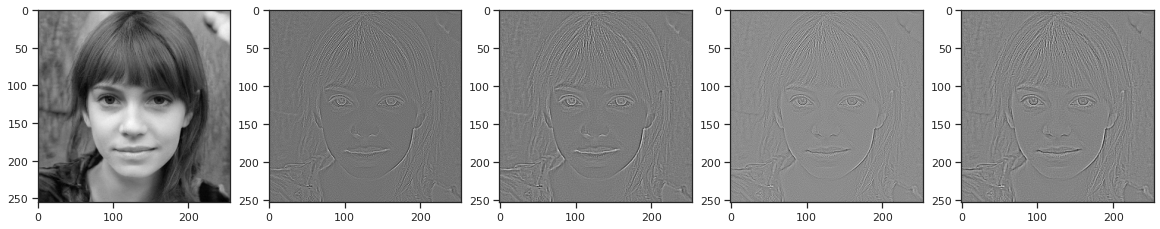

In [ ]:
fig, (a1, a2, a3, a4, a5) = plt.subplots(1, 5, figsize=(20, 5))
a1.imshow(S[:,:,0], cmap='gray')
a2.imshow(c1, cmap = 'gray')
a3.imshow(c2, cmap = 'gray')
a4.imshow(c3, cmap = 'gray')
a5.imshow(c4, cmap = 'gray')
plt.show()

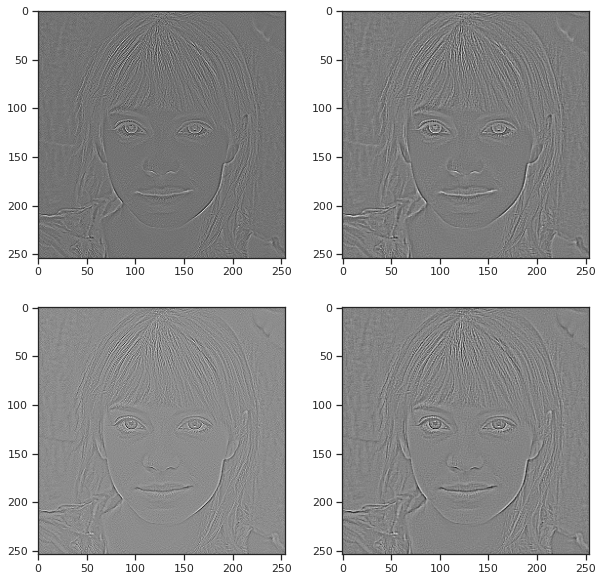

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0,0].imshow(c1, cmap = 'gray')
ax[0,1].imshow(c2, cmap = 'gray')
ax[1,0].imshow(c3, cmap = 'gray')
ax[1,1].imshow(c4, cmap = 'gray')
plt.show()

# Beépített könyvtárral

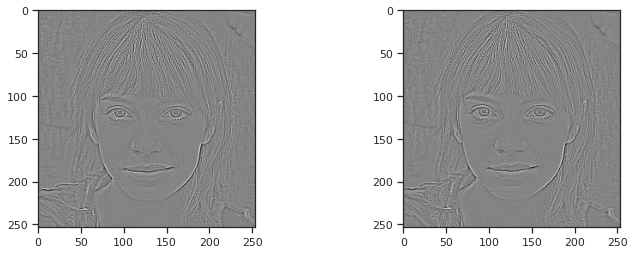

(254, 254)
(254, 254)
1.392156862745098
1.3921568627450984


False

In [ ]:
from scipy.signal import convolve2d

A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255

S = A[::4, ::4]

# Convolution with basic vertical edge detectiong kernel

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])


# Convolved image
new_images = convolve2d(S[:,:,0], kernel, mode = 'valid')

fig, (a0, a1) = plt.subplots(1, 2, figsize=(12, 4))
a0.imshow(c4, cmap = 'gray');
a1.imshow(new_images, cmap = 'gray')
plt.show()

print(new_images.shape)
print(c4.shape)

print(new_images.max())
print(c4.max())
np.array_equal(new_images, c4)

# Gradiens

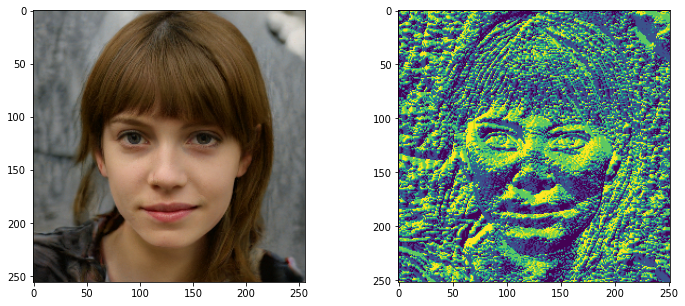

In [21]:
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255

S = A[::4, ::4]

kx = 3
ky = 3

mx = kx + 1
my = kx + 1

x = S.shape[0]-mx
y = S.shape[1]-my

c = np.zeros((x, y))

for i in range(1, x):
  for j in range(1, y):
    a = S[i-1:i+2, j-1:j+2, 0]
    c[i,j] = a.argmax()

fig, (a1, a2) = plt.subplots(1, 2, figsize=(12, 5))
a1.imshow(S)
a2.imshow(c)
plt.show()

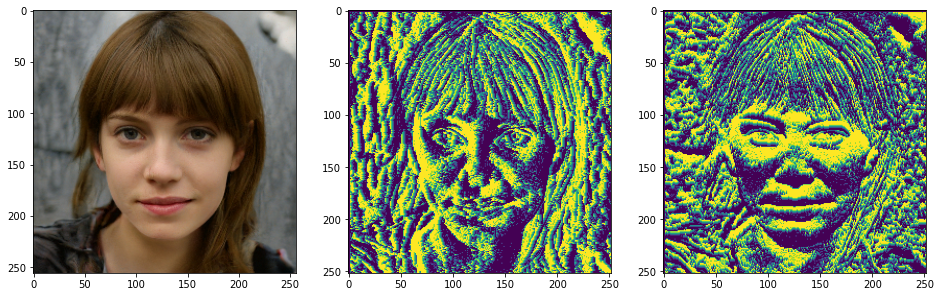

In [25]:
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255

S = A[::4, ::4]

kx = 3
ky = 3

mx = kx + 1
my = kx + 1

x = S.shape[0]-mx
y = S.shape[1]-my

c = np.zeros((x, y))
r = np.zeros((x, y))

for i in range(2, x):
  for j in range(2, y):
    a = S[i, j-2:j+3, 0]
    c[i,j] = a.argmax()
    b = S[i-2:i+3, j, 0]
    r[i,j] = b.argmax()

fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(16, 5))
a1.imshow(S)
a2.imshow(c)
a3.imshow(r)
plt.show()